<a href="https://colab.research.google.com/github/chakatzib/CS430/blob/main/MLA4_JBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [24]:
#import neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

## Imports for Splitting Data and Building Pipeline


In [26]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [28]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [29]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [30]:
#import the data

df=pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')
df.head()


,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   forgery   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [32]:
#create a dataframe called X of all inputs except for 'date' and 'forgery'
X=df.drop(columns=['forgery'])
X.head()
y=df['forgery']

### Splitting Data into Train/Test

In [33]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [34]:
#create a columntransformer to minmax scale the numerical variables
numeric_features = ['variance', 'skewness', 'curtosis', 'entropy']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
#create a pipeline to transform the data and run the decisiontreeclassification algorithm
pipeline = Pipeline(steps=[
    ('preprocessor', numeric_transformer),
    ('classifier', DecisionTreeClassifier())
])

### Executing the Model

In [35]:
#run the pipeline to fit the decisiontreeclassification model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', Pipeline(steps=[('scaler', MinMaxScaler())])),
                ('classifier', DecisionTreeClassifier())])

### Evaluating Model

In [36]:
#run the pipeline to predict y values from the test data set and save them in a variable called y_pred
y_pred = pipeline.predict(X_test)

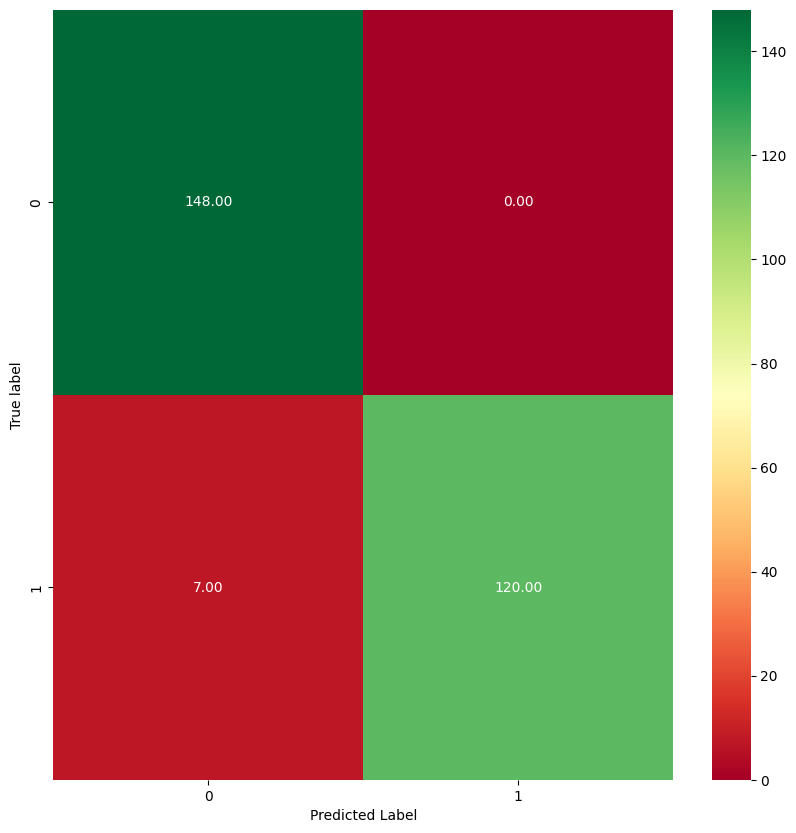

In [37]:
#call the plot_cm function to generate the confusion matrix
plot_cm(y_test, y_pred)

In [39]:
#calculate the precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('F1 Score: %.3f' % f1)

Precision: 1.000
Recall: 0.945
F1 Score: 0.972


### Conclusion
Write a general conclusion about the results of your model.

In [ ]:
# I believe that the model, assuming I made it correctly, would definitely be suitable to to find forgeries. I was really surprised by the high accuracy.


## Problem 2

### Reading the Data

In [41]:
#load the steel industry dataset into a dataframe called df1
df1=pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')
df1.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [42]:
#rename the columns in accordance with table1
new_columns={'Usage_kWh':'usage_kwh',
             'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh',
             'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh',
             'Lagging_Current_Power_Factor':'lag_current_pwr',
             'Leading_Current_Power_Factor':'lead_current_pwr',
             'NSM':'nsm',
             'WeekStatus':'week_status',
             'Day_of_week':'day_of_week',
             'Load_Type':'load_type'}
df1.rename(columns=new_columns, inplace=True)
df1.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Splitting Data into Train/Test

In [63]:
#create a dataframe called X1 for inputs that contain all columns except for date and usage_kwh
X1=df1.drop(columns=['date','usage_kwh'])
X1.head()
y1=df1['usage_kwh']
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

### Building the Pipeline

In [67]:
#Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).
categorical_features = ['lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numeric_features = [ 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh']
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [69]:
from sklearn.tree import DecisionTreeRegressor
#Create a pipeline that will transform the data and then run the DecisionTreeRegression algorithm.
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

### Executing the Model

In [70]:
#Run the pipeline to fit the DecisionTreeRegression.
pipeline1.fit(x1_train, y1_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['lag_current_pwr',
                                                   'lead_current_pwr', 'nsm',
                                                   'week_status', 'day_of_week',
                                                   'load_type'])])),
                ('regressor', DecisionTreeRegressor())])

### Evaluating Model

In [71]:
#Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.
y1_pred = pipeline1.predict(x1_test)

In [73]:
#Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive.
train_mse = mean_squared_error(y1_train, pipeline1.predict(x1_train))
test_mse = mean_squared_error(y1_test, y1_pred)
print('Train MSE: %.3f, Test MSE: %.3f' % (train_mse, test_mse))

Train MSE: 0.000, Test MSE: 109.833


In [ ]:
#I dont know how effective this is at predicting the usage_kwh when compared to the efficacy of the previous scenario and model.
#I think I did it correctly, but I am not sure how to interpret the output data.

### Conclusion
Write a general conclusion about the results of your model.

In [ ]:
#with a training MSE of 0 and a test MSE of 109.833, I assume the model is okay, but I am not sure.
#I understand precision, recall, and f1 score as outputs much more well than I do individual MSE's for training and test data.